In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import ssl

ssl._create_default_https_context = ssl._create_stdlib_context
def mse(predicted,actual):
    x_error = []
    for p,a in zip(predicted,actual):
        
        x= ((p - a)**2)
        x_error.append(x)
        
    mean_square_error = sum(x_error)/len(x_error)
        
    return mean_square_error
       

In [62]:
df = pd.read_csv("shipping.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<Axes: xlabel='Product_importance', ylabel='count'>

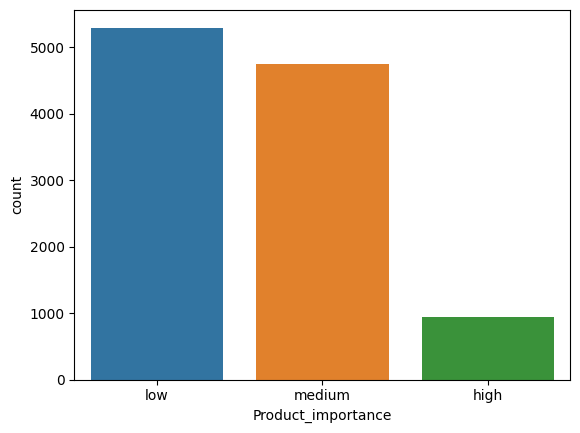

In [63]:
sns.countplot(data = df, x = "Product_importance")

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='count'>

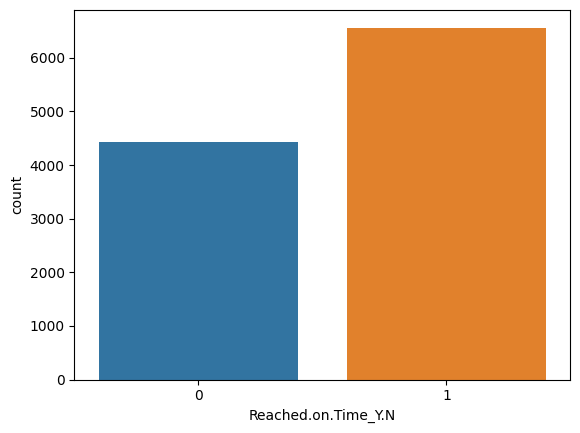

In [64]:
sns.countplot(data =df, x = "Reached.on.Time_Y.N")

In [65]:
df.drop(["Gender","Warehouse_block","Mode_of_Shipment"], axis=1,inplace= True)



In [66]:
label = df["Reached.on.Time_Y.N"]
label

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [67]:
features= df.drop(columns = ["Reached.on.Time_Y.N"])
features.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,1,4,2,177,3,low,44,1233
1,2,4,5,216,2,low,59,3088
2,3,2,2,183,4,low,48,3374
3,4,3,3,176,4,medium,10,1177
4,5,2,2,184,3,medium,46,2484


In [68]:
features = pd.get_dummies(features,dtype = int)
features.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_high,Product_importance_low,Product_importance_medium
0,1,4,2,177,3,44,1233,0,1,0
1,2,4,5,216,2,59,3088,0,1,0
2,3,2,2,183,4,48,3374,0,1,0
3,4,3,3,176,4,10,1177,0,0,1
4,5,2,2,184,3,46,2484,0,0,1


In [69]:
#normalize data using feature scaling
norm_features = (features-features.min())/(features.max()-features.min())
norm_features.drop(columns = "ID",inplace=True)
norm_features.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_high,Product_importance_low,Product_importance_medium
0,0.4,0.25,0.378505,0.125,0.671875,0.033893,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,0.906250,0.304894,0.0,1.0,0.0
2,0.0,0.25,0.406542,0.250,0.734375,0.346676,0.0,1.0,0.0
3,0.2,0.50,0.373832,0.250,0.140625,0.025712,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.703125,0.216654,0.0,0.0,1.0


In [70]:
X_train,X_test,y_train,y_test = train_test_split(norm_features,label)
y_train.shape

(8249,)

In [71]:
#create the model and fit the trianing data
lr = LogisticRegression(max_iter=100,C=1)
lr.fit(X_train,y_train)

LogisticRegression(C=1)

In [72]:
#predict ontime/not on time restuls on testing data
predictions = lr.predict(X_test)
predictions=predictions.tolist()

In [73]:
actual = y_test.tolist()
actual

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [74]:
1-mse(predictions,actual)

0.6534545454545455